In [2]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего
import seaborn as sns

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>«Статистическая проверка гипотез для связанных выборок. A/B тесты и как их проводить»</b></h3>


In [3]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t") # Подгрузим данные

# изменим формат  данных, подходящего для пакета statsmodels
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
 

df_melt.columns = ['index', 'treatments', 'value'] # заменяем имена столбцов
print(df_melt)

    index treatments  value
0       0          A     25
1       1          A     30
2       2          A     28
3       3          A     36
4       4          A     29
5       0          B     45
6       1          B     55
7       2          B     29
8       3          B     56
9       4          B     40
10      0          C     30
11      1          C     29
12      2          C     33
13      3          C     37
14      4          C     27
15      0          D     54
16      1          D     60
17      2          D     51
18      3          D     62
19      4          D     73


**Получаем коробчатую диаграмму, чтобы увидеть распределение данных по группам.** 

**Используя коробчатую диаграмму, мы можем легко обнаружить различия между разными методами лечения**

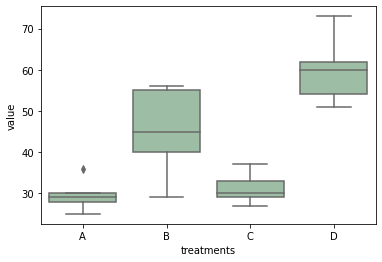

In [4]:
import seaborn as sns  # Еще дна библиотека для визуализации данных, но более продвинутая
#sns.set(rc={'figure.figsize':(10, 5)})  # можно менять ширину и высоту при желании


ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
#ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [5]:
import scipy.stats as stats
# Функция f_oneway принимает группы в качестве входных данных и возвращает значения F и P
fvalue, pvalue = stats.f_oneway(df['A'],  df['B'], df['C'], df['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

17.492810457516338 2.639241146210922e-05


In [6]:
fvalue, pvalue = stats.f_oneway(df['A'], df['C'])
fvalue, pvalue

(0.40634920634920635, 0.5416380250488471)

### Начнем с датасета про морских гребешков

In [7]:
abalone = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/abalone.csv'
data = pd.read_csv(abalone, error_bad_lines=False)
data.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [8]:
half = len(data['Length']) // 2 

sam1 = data.loc[half:, 'Length'] # Берем первую половину данных
sam2 = data.loc[:half, 'Length'] # Берем вторую половину данных

stats.ttest_ind(sam2, sam1) # применяем тест Стьюдента. 

Ttest_indResult(statistic=-1.5812897200356624, pvalue=0.11388753958977987)

In [9]:
stats.ttest_ind(df['A'],  df['C'])

Ttest_indResult(statistic=-0.6374552583116757, pvalue=0.541638025048848)

# Дисперсионный анализ и датасет про раковины

<div class="alert alert-info">
Вот некоторые данные об измерении раковины (длина рубца передней приводящей мышцы, стандартизированная путем деления на длину) у мидии Mytilus trossulus из пяти мест: 
Тилламук, Орегон; Ньюпорт, Орегон; Петербург, Аляска; Магадан, Россия и Tvarminne, Финляндия.
</div>

In [10]:
from scipy.stats import f_oneway # импортирем функцию для дисперсионного анализа из библиотеки scipy пакета stats

# Берем несколько выборок с размерами раковин разных видов
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

F, p = f_oneway(tillamook, newport, petersburg, magadan, tvarminne)  # дисперсионный анализ (ДА) в python

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

7.121019471642447 0.0002812242314534544
Разное распределение (отклоняем H0)


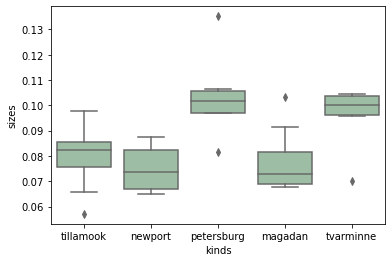

In [11]:
import seaborn as sns  # Еще дна библиотека для визуализации данных, но более продвинутая
 
#Немного преобразуем данные, не важно как
sizes = tillamook + newport +petersburg + magadan + tvarminne
kinds = ['tillamook']*len(tillamook) + ['newport']*len(newport)+['petersburg']*len(petersburg)+['magadan']*len(magadan) + ['tvarminne']*len(tvarminne)
df_mid = pd.DataFrame()
df_mid['sizes'] = sizes
df_mid['kinds'] = kinds


ax = sns.boxplot(x='kinds', y='sizes', data=df_mid, color='#99c2a2')
#ax = sns.swarmplot(x="kinds", y="sizes", data=df_mid, color='#7d0013')
plt.show()

**Можете привести пример когда выборки зависимы, а когда нет ?**

# Критерием Манна-Уитни

In [12]:
# Тест Вилкоксона для независимых выборок также называется критерием Манна-Уитни

from scipy.stats import mannwhitneyu # Импортируем нужный тест из пакета scipy
 
# Генерируем две независимых выборки
group =  [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]*5  # Некий общий элемент
group_1 = group*5
group_2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]*5

# Сравнение групп
stat, p = mannwhitneyu(group_1, group_2) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))


# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=6250.000, p=0.000
Разные распределения (отвергаем H0)


21.0 22.75


(array([10.,  0.,  0., 10.,  5., 10., 10.,  5.,  0., 10.]),
 array([17. , 18.1, 19.2, 20.3, 21.4, 22.5, 23.6, 24.7, 25.8, 26.9, 28. ]),
 <BarContainer object of 10 artists>)

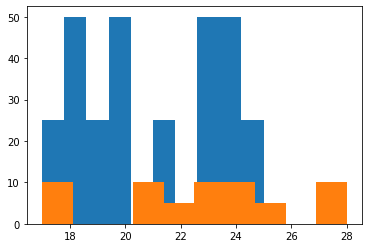

In [13]:
print(np.mean(group_1), np.mean(group_2))

plt.hist(group_1)
plt.hist(group_2)

C:\Users\Solnotka\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


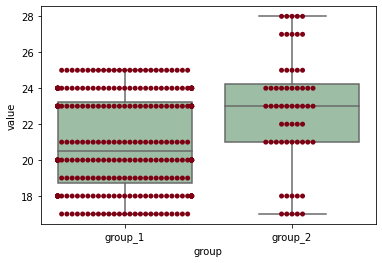

In [14]:
data_group = pd.DataFrame()
data_group['value'] = group_1 + group_2 
data_group['group'] = ['group_1']*len(group_1)+['group_2']*len(group_2)

ax = sns.boxplot(x='group', y='value', data=data_group, color='#99c2a2')
ax = sns.swarmplot(x="group", y="value", data=data_group, color='#7d0013')
plt.show()
# pd.DataFrame(group_2).hist()



**Какие выборки зависимы? Приведите пример**

# Критерий Уилкоксона  

In [15]:
from scipy.stats import wilcoxon  # Wilcoxon signed-rank test
 

group =  [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]  # Некий общий элемент

group_1 = group + group 

group_2 = group + [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

group_3 = group + [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 18] # отличие только в одном элементе

import scipy.stats as stats

#Выполняем the Wilcoxon-Signed Rank Test
 

stat, p = wilcoxon(group_1, group_2)
#stat, p = wilcoxon(group_1, group_3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=10.500, p=0.044
Разные распределения (отвергаем H0)


C:\Users\Solnotka\anaconda3\lib\site-packages\scipy\stats\morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


(array([5., 1., 2., 3., 1., 4., 4., 2., 0., 2.]),
 array([17. , 18.1, 19.2, 20.3, 21.4, 22.5, 23.6, 24.7, 25.8, 26.9, 28. ]),
 <BarContainer object of 10 artists>)

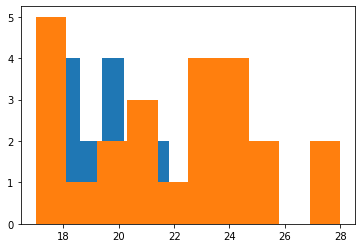

In [16]:
  
plt.hist(group_1)
plt.hist(group_2)

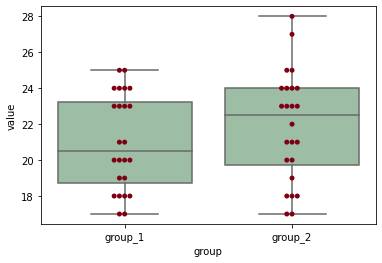

In [17]:
data_group = pd.DataFrame()
data_group['value'] = group_1 + group_2 
data_group['group'] = ['group_1']*len(group_1)+['group_2']*len(group_2)

ax = sns.boxplot(x='group', y='value', data=data_group, color='#99c2a2')
ax = sns.swarmplot(x="group", y="value", data=data_group, color='#7d0013')
plt.show()
# pd.DataFrame(group_2).hist()



# Задания для самостоятельного решения

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

**Замечание: 2** Для зачета уже достаточно половины абсолютно верно решенных заданий. 

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 




<div class="alert alert-info">
<b>Задание № 1</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [18]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код
from scipy.stats import mannwhitneyu

mannwhitneyu(A, B)

MannwhitneyuResult(statistic=4343.0, pvalue=0.054347680446611354)

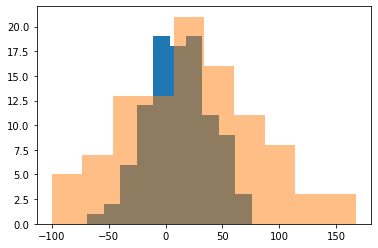

In [19]:
import matplotlib.pyplot as plt

plt.hist(A);
plt.hist(B, alpha=.5);

<AxesSubplot:xlabel='group', ylabel='value'>

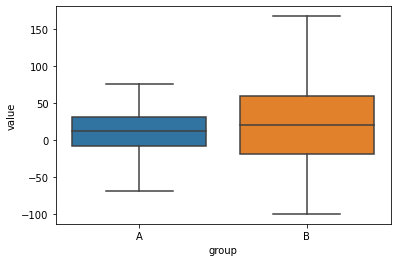

In [20]:
import seaborn as sns

for_box_dict = {'value': list(A) + list(B), 'group': ['A'] * len(A) + ['B'] * len(B)}
for_box = pd.DataFrame(data=for_box_dict)

sns.boxplot(x='group', y='value', data=for_box)

p-value превышает 5%, следовательно, нулевую гипотезу нельзя отвергнуть (различия в эффекте не подтверждены)

<div class="alert alert-info">
<b>Задание № 2</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [21]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код
from scipy.stats import wilcoxon
wilcoxon(A, B)

WilcoxonResult(statistic=1930.0, pvalue=0.04077572901549266)

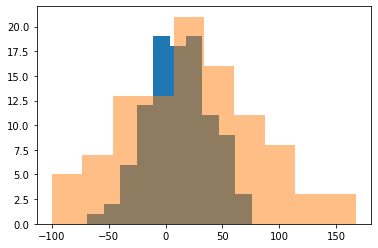

In [22]:
import matplotlib.pyplot as plt

plt.hist(A);
plt.hist(B, alpha=.5);

Несмотря, на то, что выборки те же, что и в задании 1, здесь p-value превосходит уровень значимости 5%. Следовательно, для зависимых выборок можно отвергнуть нулевую гипотезу для уровня значимости 5%. Эффект является значимым.

<div class="alert alert-info">
<b>Задание № 3</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобрением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [23]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# Ваш код
from scipy.stats import f_oneway, ttest_ind

print(f_oneway(water, nutri, mineral))
print(f_oneway(water, nutri))
print(ttest_ind(water, nutri))
print(f_oneway(water, mineral))
print(ttest_ind(water, mineral))

F_onewayResult(statistic=12.525963044834192, pvalue=2.9240047906326866e-05)
F_onewayResult(statistic=17.075344953751724, pvalue=0.0001840453200503372)
Ttest_indResult(statistic=-4.132232441883167, pvalue=0.0001840453200503376)
F_onewayResult(statistic=0.010260999552998775, pvalue=0.9198340218471527)
Ttest_indResult(statistic=0.10129659201078253, pvalue=0.919834021847144)


<AxesSubplot:xlabel='group', ylabel='value'>

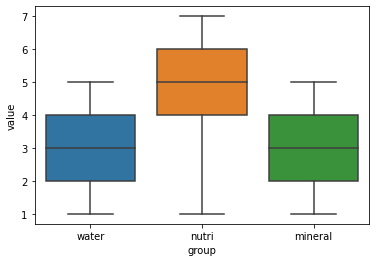

In [24]:
import seaborn as sns

for_box_dict = {'value': water + nutri + mineral, 'group': ['water'] * len(water) +
                ['nutri'] * len(nutri) + ['mineral'] * len(mineral)}
                                                           
for_box = pd.DataFrame(data=for_box_dict)

sns.boxplot(x='group', y='value', data=for_box)

<AxesSubplot:xlabel='group', ylabel='value'>

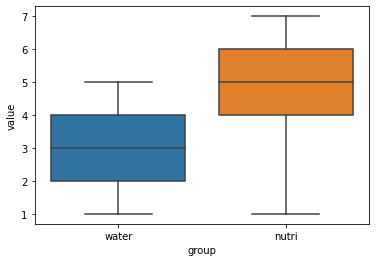

In [25]:
nutri_dict = {'value': water + nutri, 'group': ['water'] * len(water) + ['nutri'] * len(nutri)}
                                                           
nutri = pd.DataFrame(data=nutri_dict)

sns.boxplot(x='group', y='value', data=nutri)

<AxesSubplot:xlabel='group', ylabel='value'>

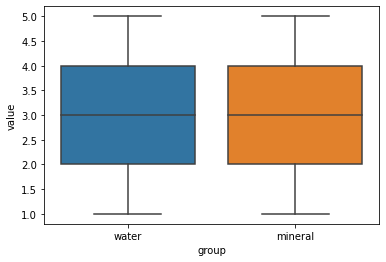

In [26]:
mineral_dict = {'value': water + mineral, 'group': ['water'] * len(water) + ['mineral'] * len(mineral)}
                                                           
mineral = pd.DataFrame(data=mineral_dict)

sns.boxplot(x='group', y='value', data=mineral)

Выводы:
Дисперсионный анализ показал значимые различия между группами (water, mineral, nutri). При этом попарное сравнение при помощи дисперсионного анализа и t-testa продемонстрировало значимые различия только между группами water и nutri. При сравнении групп water и mineral p-value не превосходит уровня доверия 5%, а значит, наличие эффекта от минеральных удобрений не доказано.

# Cookie Cats

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [27]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

In [28]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [29]:
#Ваши выводы
Выборки примерно одинаковы по величине.

SyntaxError: invalid syntax (<ipython-input-29-04a4bd0a582b>, line 2)

In [ ]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

**Ваши выводы**
По частоте игровых раундов выборки похожи.

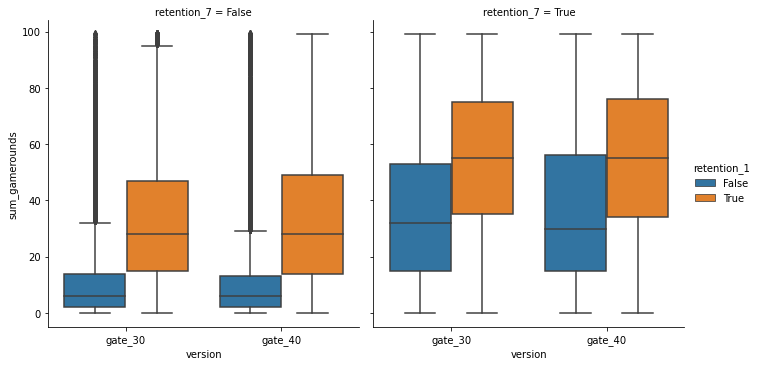

In [30]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

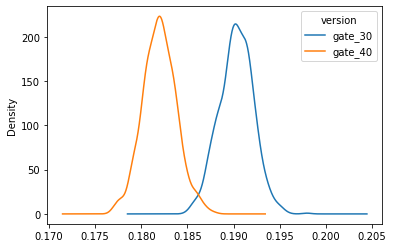

In [31]:
#Если вдруг оказалось сложно, то вот еще ододин способ визуализации различий
# Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

 По графикам создается ощущение, что выборки по значимым параметрам не различаются. Но при этом на последнем графике видно, что возвратов на 7 день было больше в случае выборки gate-30.

#### Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

In [32]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

#Ваш код. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [33]:
#Для начала проверяем различия по совокупности критериев.
#Буду использовать дисперсионный анализ и критерий Манна-Уитни (для несвязанных выборок).

data_retention = data.pivot_table(index=['sum_gamerounds', 'retention_1', 'retention_7'], columns='version',
                                  aggfunc='count', fill_value=0)
data_retention

userid        
version                                gate_30 gate_40
sum_gamerounds retention_1 retention_7                
0              False       False          1881    2002
                           True             15       9
               True        False            40      42
                           True              1       4
1              False       False          2646    2688
...                                        ...     ...
2294           True        True              0       1
2438           True        True              1       0
2640           True        False             0       1
2961           True        True              1       0
49854          False       True              1       0

[1982 rows x 2 columns]

In [34]:
data_retention.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1982 entries, (0, False, False) to (49854, False, True)
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   (userid, gate_30)  1982 non-null   int64
 1   (userid, gate_40)  1982 non-null   int64
dtypes: int64(2)
memory usage: 46.3 KB


In [35]:
f_oneway(data_retention[('userid', 'gate_30')], data_retention[('userid', 'gate_40')])

F_onewayResult(statistic=0.010412628901438747, pvalue=0.9187282716770381)

In [36]:
mannwhitneyu(data_retention[('userid', 'gate_30')], data_retention[('userid', 'gate_40')])

MannwhitneyuResult(statistic=1945352.5, pvalue=0.29906324553107266)

In [37]:
#Теперь посмотрим различия по отдельным показателям. Буду использовать те же два теста.
# Сначала количество раундов.

data_gamerounds = data[['version', 'userid', 'sum_gamerounds']].pivot_table(index='sum_gamerounds',
                                                         columns='version', aggfunc='count', fill_value=0)
data_gamerounds

userid        
version        gate_30 gate_40
sum_gamerounds                
0                 1937    2057
1                 2749    2789
2                 2198    2408
3                 1899    2059
4                 1831    1798
...                ...     ...
2294                 0       1
2438                 1       0
2640                 0       1
2961                 1       0
49854                1       0

[942 rows x 2 columns]

In [38]:
f_oneway(data_gamerounds[('userid', 'gate_30')], data_gamerounds[('userid', 'gate_40')])

F_onewayResult(statistic=0.00792190753209978, pvalue=0.929087328372469)

In [39]:
mannwhitneyu(data_gamerounds[('userid', 'gate_30')], data_gamerounds[('userid', 'gate_40')])

MannwhitneyuResult(statistic=442252.5, pvalue=0.45140335827459765)

In [40]:
#Теперь проверяем количество возвратов через день.
data_retone = data[['version', 'userid', 'retention_1']].pivot_table(index='retention_1',
                                                         columns='version', aggfunc='count', fill_value=0)
data_retone

userid        
version     gate_30 gate_40
retention_1                
False         24666   25370
True          20034   20119

In [41]:
f_oneway(data_retone[('userid', 'gate_30')], data_retone[('userid', 'gate_40')])

F_onewayResult(statistic=0.012697144564607164, pvalue=0.9205737941653265)

In [42]:
mannwhitneyu(data_retone[('userid', 'gate_30')], data_retone[('userid', 'gate_40')])

MannwhitneyuResult(statistic=1.0, pvalue=0.34926767915166934)

In [43]:
#Количество возвратов через неделю
data_retfive = data[['version', 'userid', 'retention_7']].pivot_table(index='retention_7',
                                                         columns='version', aggfunc='count', fill_value=0)
data_retfive

userid        
version     gate_30 gate_40
retention_7                
False         36198   37210
True           8502    8279

In [44]:
f_oneway(data_retfive[('userid', 'gate_30')], data_retfive[('userid', 'gate_40')])

F_onewayResult(statistic=0.000388088140305759, pvalue=0.9860713811037624)

In [45]:
mannwhitneyu(data_retfive[('userid', 'gate_30')], data_retfive[('userid', 'gate_40')])

MannwhitneyuResult(statistic=2.0, pvalue=0.34926767915166934)

In [46]:
# На всякий случай еще проверю сочетание критериев retention_1 и retention_7.
data_retall = data[['version', 'userid', 'retention_1', 'retention_7']].pivot_table(index=['retention_1', 'retention_7'],
                                                         columns='version', aggfunc='count', fill_value=0)
data_retall

userid        
version                 gate_30 gate_40
retention_1 retention_7                
False       False         22840   23597
            True           1826    1773
True        False         13358   13613
            True           6676    6506

In [47]:
f_oneway(data_retall[('userid', 'gate_30')], data_retall[('userid', 'gate_40')])

F_onewayResult(statistic=0.0008999887602785821, pvalue=0.9770401948607409)

In [48]:
mannwhitneyu(data_retall[('userid', 'gate_30')], data_retall[('userid', 'gate_40')])

MannwhitneyuResult(statistic=8.0, pvalue=0.44261695723660077)

**Ваши выводы?** 

1. Тесты показывают, что по совокупности критериев выборки не отличаются (p-value не превосходит уровень значимости 5%).
2. По количеству игровых раундов и возвратов через день / неделю также нельзя отвергнуть нулевую гипотезу.
3. Тесты по критерию Манна-Уитни демонстрируют более низкий уровень p-value, но все равно он никогда не превосходит уровень значимости 5%.

Таким образом, гипотеза о том, что уровень, на котором расположены ворота, каким-то образом влияет на вовлеченность игроков и количество их возвратов, не подтвердилась

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [49]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [50]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


# Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [51]:
#Сначала избавлюсь от лишних строк.
pokemon_filtered = pokemon.drop(pokemon[(pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] == 'Grass')].index)
pokemon_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        798 non-null    int64 
 1   Name       797 non-null    object
 2   Class 1    798 non-null    object
 3   Class 2    412 non-null    object
 4   HP         798 non-null    int64 
 5   Attack     798 non-null    int64 
 6   Defense    798 non-null    int64 
 7   Sp. Atk    798 non-null    int64 
 8   Sp. Def    798 non-null    int64 
 9   Speed      798 non-null    int64 
 10  Legendary  798 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.4+ KB


In [52]:
#Нужно убедиться, что второго возможного сочетания в таблице нет
pokemon[pokemon['Class 2']=='Rock']

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
119,120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False
120,121,Rhydon,Ground,Rock,105,130,120,45,45,40,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,False
237,238,Magcargo,Fire,Rock,50,50,120,80,80,30,False
240,241,Corsola,Water,Rock,55,55,85,65,85,35,False
330,331,Aron,Steel,Rock,50,70,100,40,40,30,False
331,332,Lairon,Steel,Rock,60,90,140,50,50,40,False
332,333,Aggron,Steel,Rock,70,110,180,60,60,50,False
404,405,Relicanth,Water,Rock,100,90,130,45,65,55,False
515,516,Rhyperior,Ground,Rock,115,140,130,55,55,40,False


In [53]:
#Получаю df по отдельным классам
pokemon_grass_1 = pokemon_filtered[['pid', 'Class 1', 'Attack']][pokemon_filtered['Class 1']=='Grass']
pokemon_grass_2 = pokemon_filtered[['pid', 'Class 2', 'Attack']][pokemon_filtered['Class 2']=='Grass']
pokemon_grass = pokemon_grass_1[['pid', 'Attack']].merge(pokemon_grass_2[['pid', 'Attack']], how='outer')

pokemon_rock_1 = pokemon_filtered[['pid', 'Class 1', 'Attack']][pokemon_filtered['Class 1']=='Rock']
pokemon_rock_2 = pokemon_filtered[['pid', 'Class 2', 'Attack']][pokemon_filtered['Class 2']=='Rock']
pokemon_rock = pokemon_rock_1[['pid', 'Attack']].merge(pokemon_rock_2[['pid', 'Attack']], how='outer')

In [54]:
#Сначала просто получу среднее по атаке для обоих массивов
print(f'Средняя величина атаки в классе Grass = {pokemon_grass.Attack.mean():.2f}')
print(f'Средняя величина атаки в классе Rock = {pokemon_rock.Attack.mean():.2f}')

Средняя величина атаки в классе Grass = 73.73
Средняя величина атаки в классе Rock = 91.79


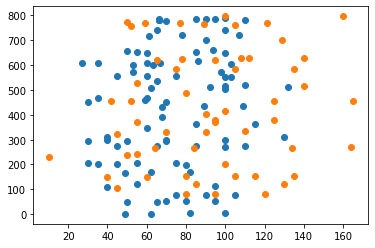

In [55]:
# Построю точечные графики, которые демострируют, что у покемонов класса rock атака больше
plt.scatter(x=pokemon_grass['Attack'], y=pokemon_grass['pid'])
plt.scatter(x=pokemon_rock['Attack'], y=pokemon_rock['pid'])

In [56]:
#Проведу тест Манна-Уитни для несвязанных выборок, чтобы убедиться, что различия статистически значимы
mannwhitneyu(pokemon_grass['Attack'], pokemon_rock['Attack'])

MannwhitneyuResult(statistic=1816.5, pvalue=0.0010133329572143746)

Таким образом, покемоны класса Rock имеют более высокую атаку, чем покемоны класса Grass. Различия статистически значимы: p-value, полученный с помощью теста Манна-Уитни, превосходит уровень значимости 1%.

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [57]:
#Сначала избавлюсь от лишних строк.
pokemon_filtered = pokemon.drop(pokemon[(pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] == 'Normal')].index)
pokemon_filtered = pokemon.drop(pokemon[(pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] == 'Water')].index)
pokemon_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        799 non-null    int64 
 1   Name       798 non-null    object
 2   Class 1    799 non-null    object
 3   Class 2    413 non-null    object
 4   HP         799 non-null    int64 
 5   Attack     799 non-null    int64 
 6   Defense    799 non-null    int64 
 7   Sp. Atk    799 non-null    int64 
 8   Sp. Def    799 non-null    int64 
 9   Speed      799 non-null    int64 
 10  Legendary  799 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.4+ KB


In [58]:
#Получаю df по отдельным классам
pokemon_water_1 = pokemon_filtered[['pid', 'Class 1','Speed']][pokemon_filtered['Class 1']=='Water']
pokemon_water_2 = pokemon_filtered[['pid', 'Class 2', 'Speed']][pokemon_filtered['Class 2']=='Water']
pokemon_water = pokemon_water_1[['pid', 'Speed']].merge(pokemon_water_2[['pid', 'Speed']], how='outer')

pokemon_normal_1 = pokemon_filtered[['pid', 'Class 1', 'Speed']][pokemon_filtered['Class 1']=='Normal']
pokemon_normal_2 = pokemon_filtered[['pid', 'Class 2', 'Speed']][pokemon_filtered['Class 2']=='Normal']
pokemon_normal = pokemon_normal_1[['pid', 'Speed']].merge(pokemon_normal_2[['pid', 'Speed']], how='outer')

In [59]:
#Считаю среднюю скорость в обеих группах
print(f'Средняя скорость в классе Water = {pokemon_water.Speed.mean():.2f}')
print(f'Средняя скорость  в классе Normal = {pokemon_normal.Speed.mean():.2f}')

Средняя скорость в классе Water = 64.94
Средняя скорость  в классе Normal = 72.26


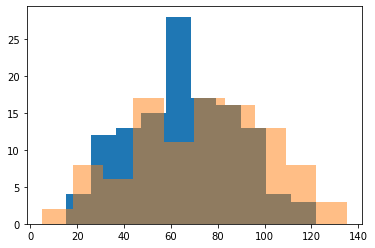

In [60]:
# Построю гистограммы, которые демострируют различия скорости у покемонов обоих классов.
#Картина не такая яркая, как в предыдущем случае, но все-таки отличия заметны.

plt.hist(pokemon_water['Speed']);
plt.hist(pokemon_normal['Speed'], alpha=.5);

In [61]:
#Проведу тест Манна-Уитни для несвязанных выборок, чтобы убедиться, что различия статистически значимы
mannwhitneyu(pokemon_water['Speed'], pokemon_normal['Speed'])

MannwhitneyuResult(statistic=5299.5, pvalue=0.019054075952764978)

Таким образом, покемоны класса Normal быстрее, чем покемоны класса Water. Различия являются статистически значимыми: p-value по критерию Манна-Уитни превосходит 5%-ный уровень значимости.

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [62]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [67]:
#Сначала посмотрим на характеристики этих четырех покемонов в целом
pokemon_treathed = pokemon[pokemon['Name'].apply(lambda x: x in treathed_pokemon)]
pokemon_treathed

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


<AxesSubplot:>

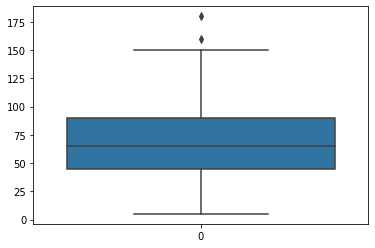

In [69]:
sns.boxplot(data=pokemon['Speed'])

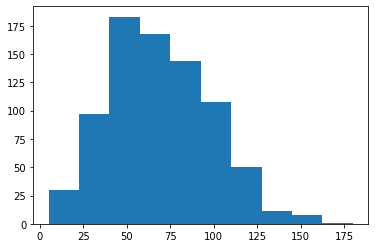

In [76]:
plt.hist(pokemon['Speed']);

In [78]:
#Посмотрю, как в целом выглядит столбец "Speed"
pokemon['Speed'].describe()

count    800.000000
mean      68.277500
std       29.060474
min        5.000000
25%       45.000000
50%       65.000000
75%       90.000000
max      180.000000
Name: Speed, dtype: float64

In [81]:
#Посмотрю, являются ли значения ускоренных покемонов выбросами для выборки в целом
q1 = pokemon['Speed'].quantile(0.25)
q3 = pokemon['Speed'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(q1, q3, lower_bound, upper_bound)

45.0 90.0 -22.5 157.5


In [82]:
#Таким образом, в целом по выборке эти значения соответствуют нормальному распределению и выбросами не являются.
#Далее надо посмотреть, являются ли данные значения нормальными для классов, в которые входят ускоренные покемоны.
pokemon_treathed

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [97]:
#Сначала проверяю класс Bug и значение скорости 145.
pokemon_bug = pokemon[(pokemon['Class 1'] == 'Bug') | (pokemon['Class 2'] == 'Bug')]
pokemon_bug['Speed'].describe()

count     72.000000
mean      61.680556
std       32.618938
min        5.000000
25%       36.000000
50%       60.000000
75%       85.000000
max      160.000000
Name: Speed, dtype: float64

In [98]:
q1 = pokemon_bug['Speed'].quantile(0.25)
q3 = pokemon_bug['Speed'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(q1, q3, lower_bound, upper_bound)

36.0 85.0 -37.5 158.5


In [100]:
#В классе Bug значение 145 выбросом не является.
#Проверяю класс Poison для значения 145
pokemon_poison = pokemon[(pokemon['Class 1'] == 'Poison') | (pokemon['Class 2'] == 'Poison')]
pokemon_poison['Speed'].describe()

count     62.000000
mean      65.258065
std       26.904162
min       15.000000
25%       45.500000
50%       62.500000
75%       80.000000
max      145.000000
Name: Speed, dtype: float64

In [101]:
q1 = pokemon_poison['Speed'].quantile(0.25)
q3 = pokemon_poison['Speed'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(q1, q3, lower_bound, upper_bound)

45.5 80.0 -6.25 131.75


C:\Users\Solnotka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Speed'>

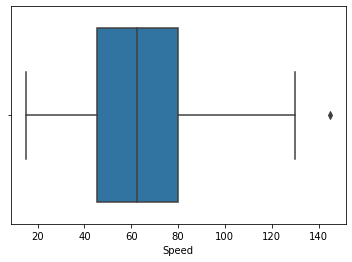

In [109]:
sns.boxplot(pokemon_poison['Speed'])

In [104]:
#Для класса Poison значение 145 является выбросом. Попробую посмотреть, как выглядят другие покемоны с таким сочетанием классов.
pokemon_bug_poison = pokemon[((pokemon['Class 1'] == 'Bug') & (pokemon['Class 2'] == 'Poison')) |
                            ((pokemon['Class 1'] == 'Poison') & (pokemon['Class 2'] == 'Bug'))]

pokemon_bug_poison['Speed'].describe()

count     13.000000
mean      65.846154
std       33.024855
min       30.000000
25%       45.000000
50%       57.000000
75%       75.000000
max      145.000000
Name: Speed, dtype: float64

In [105]:
q1 = pokemon_bug_poison['Speed'].quantile(0.25)
q3 = pokemon_bug_poison['Speed'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(q1, q3, lower_bound, upper_bound)

45.0 75.0 0.0 120.0


C:\Users\Solnotka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Speed'>

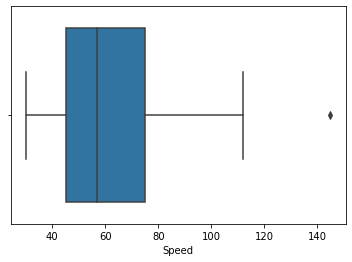

In [108]:
sns.boxplot(pokemon_bug_poison['Speed'])

In [112]:
#Как видно из расчетов и графиков, в рамках класса Poison и особенно в выборке покемонов, сочетающих класс Bug и класс Poison,
#значение 145 является выбросом.
#Теперь проверяем класс Psychic и два значения 150
pokemon_psychic = pokemon[(pokemon['Class 1'] == 'Psychic') | (pokemon['Class 2'] == 'Psychic')]
pokemon_psychic['Speed'].describe()

count     90.000000
mean      77.088889
std       35.340604
min       15.000000
25%       48.500000
50%       77.500000
75%      103.000000
max      180.000000
Name: Speed, dtype: float64

In [113]:
q1 = pokemon_psychic['Speed'].quantile(0.25)
q3 = pokemon_psychic['Speed'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(q1, q3, lower_bound, upper_bound)

48.5 103.0 -33.25 184.75


C:\Users\Solnotka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Speed'>

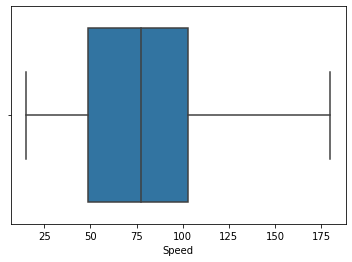

In [114]:
sns.boxplot(pokemon_psychic['Speed'])

In [117]:
#Итак, в классе Psychic выбросов нет. Посмотрим теперь сочетание классов Psychic / NaN
pokemon_psychic_only = pokemon[((pokemon['Class 1'] == 'Psychic') & (pokemon['Class 2'] != pokemon['Class 2'])) |
                            ((pokemon['Class 1'] != pokemon['Class 1']) & (pokemon['Class 2'] == 'Psychic'))]

pokemon_psychic_only['Speed'].describe()

count     38.000000
mean      78.868421
std       42.776712
min       20.000000
25%       42.750000
50%       74.000000
75%      104.750000
max      180.000000
Name: Speed, dtype: float64

In [118]:
q1 = pokemon_psychic_only['Speed'].quantile(0.25)
q3 = pokemon_psychic_only['Speed'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(q1, q3, lower_bound, upper_bound)

42.75 104.75 -50.25 197.75


<AxesSubplot:xlabel='Speed'>

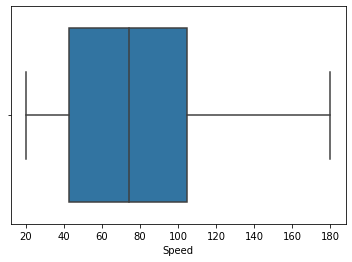

In [120]:
sns.boxplot(pokemon_psychic_only['Speed'])

In [121]:
#Для класса Psychic значения ускоренных покемонов вписываются в нормальное распределение.
#Осталось проверить классы Normal и Fighting со значением 135
pokemon_normal = pokemon[(pokemon['Class 1'] == 'Normal') | (pokemon['Class 2'] == 'Normal')]
pokemon_normal['Speed'].describe()

count    102.000000
mean      72.245098
std       28.286524
min        5.000000
25%       50.000000
50%       71.500000
75%       92.500000
max      135.000000
Name: Speed, dtype: float64

In [122]:
q1 = pokemon_normal['Speed'].quantile(0.25)
q3 = pokemon_normal['Speed'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(q1, q3, lower_bound, upper_bound)

50.0 92.5 -13.75 156.25


C:\Users\Solnotka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Speed'>

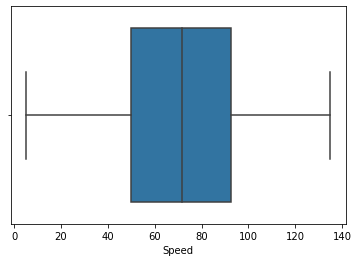

In [123]:
sns.boxplot(pokemon_normal['Speed'])

In [124]:
pokemon_fighting = pokemon[(pokemon['Class 1'] == 'Fighting') | (pokemon['Class 2'] == 'Fighting')]
pokemon_fighting['Speed'].describe()

count     53.000000
mean      76.528302
std       27.906164
min       25.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      135.000000
Name: Speed, dtype: float64

In [125]:
q1 = pokemon_fighting['Speed'].quantile(0.25)
q3 = pokemon_fighting['Speed'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(q1, q3, lower_bound, upper_bound)

55.0 100.0 -12.5 167.5


C:\Users\Solnotka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Speed'>

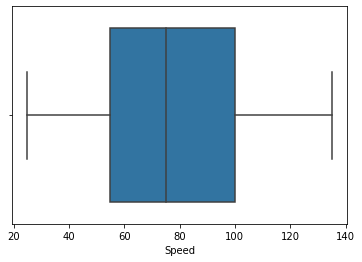

In [126]:
sns.boxplot(pokemon_fighting['Speed'])

In [127]:
#Проверяем сочетание классов
pokemon_normal_fighting = pokemon[((pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] == 'Fighting')) |
                            ((pokemon['Class 1'] == 'Fighting') & (pokemon['Class 2'] == 'Normal'))]

pokemon_normal_fighting

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,False


Таким образом, значения скорости ускоренных покемонов в целом вписываются в нормальное распределение как в целой выборке,так и по классам.

Теперь необходимо проверить, привело ли использование средства к статистически значимым различиям.
В выборке есть покемоны, к которым применяли это средство, и те, к которым его не применяли. Нет данных о предыдущем состоянии ускоренных покемонов. Соответственно, необходимо провести тесты для несвязанных выборок для pokemon_treathed и pokemon - pokemon_treathed. Сначала я сравню pokemon_treathed с общей выборкой, а затем - с покемонами, которые не были ускорены, но относятся к тем же классам, что и ускоренные.

In [231]:
pokemon_standard = pokemon.where(pokemon.Name.apply(lambda x: x not in treathed_pokemon)).dropna(how='all')

pokemon_standard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pid        796 non-null    float64
 1   Name       795 non-null    object 
 2   Class 1    796 non-null    object 
 3   Class 2    412 non-null    object 
 4   HP         796 non-null    float64
 5   Attack     796 non-null    float64
 6   Defense    796 non-null    float64
 7   Sp. Atk    796 non-null    float64
 8   Sp. Def    796 non-null    float64
 9   Speed      796 non-null    float64
 10  Legendary  796 non-null    float64
dtypes: float64(8), object(3)
memory usage: 74.6+ KB


In [232]:
mannwhitneyu(pokemon_treathed['Speed'], pokemon_standard['Speed'])

MannwhitneyuResult(statistic=19.5, pvalue=0.0003226818390404643)

In [233]:
pokemon_selected = pokemon_bug_poison.merge(pokemon_psychic_only,
                                            how='outer').merge(pokemon_normal_fighting,
                                                               how='outer').where(pokemon_selected.Name.apply(lambda x: x not in treathed_pokemon)).dropna(how='all')

mannwhitneyu(pokemon_treathed['Speed'], pokemon_selected['Speed'])

MannwhitneyuResult(statistic=8.0, pvalue=0.0012817216883896137)

In [234]:
stats.ttest_ind(pokemon_treathed['Speed'], pokemon_selected['Speed'])

Ttest_indResult(statistic=3.8117757799719687, pvalue=0.00037307965881664204)

In [235]:
f_oneway(pokemon_treathed['Speed'], pokemon_selected['Speed'])

F_onewayResult(statistic=14.529634596780916, pvalue=0.00037307965881664307)

Таким образом, выборки ускоренных и неускоренных покемонов демонстрируют статистически значимые различия, согласно тестам по критерию Манна-Уитни, по критерию Фишера и по тесту Стьюдента. Однако слишком маленький размер выборки ускоренных покемонов и то, что значения их скорости в основном укладываются в нормальное распределение по классам, не дает поверить в эффект средства. Поэтому я попробую извлечь четырех случайных покемонов из pokemon_selected и сравнить pokemon_selected с ними.

In [240]:
pokemon_selected_2 = pokemon_selected.merge(pokemon_treathed, how='outer')

import random

pokemon_names = random.sample(list(pokemon_selected_2.Name), 4)

pokemon_random = pokemon_selected_2.where(pokemon_selected_2.Name.apply(lambda x: x in pokemon_names)).dropna(how='all')

pokemon_selected_3 = pokemon_selected_2.where(pokemon_selected_2.Name.apply(lambda x: x not in pokemon_names)).dropna(how='all')

print(pokemon_random)
print(pokemon_selected_2.info())
print(pokemon_selected_3.info())

      pid        Name  Class 1 Class 2     HP  Attack  Defense  Sp. Atk  \
2    19.0    Beedrill      Bug  Poison   65.0    90.0     40.0     45.0   
7   293.0      Dustox      Bug  Poison   60.0    50.0     70.0     50.0   
10  605.0  Whirlipede      Bug  Poison   40.0    55.0     99.0     40.0   
34  547.0   Cresselia  Psychic     NaN  120.0    70.0    120.0     75.0   

    Sp. Def  Speed Legendary  
2      80.0   75.0     False  
7      90.0   65.0     False  
10     79.0   47.0     False  
34    130.0   85.0     False  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pid        53 non-null     float64
 1   Name       53 non-null     object 
 2   Class 1    53 non-null     object 
 3   Class 2    15 non-null     object 
 4   HP         53 non-null     float64
 5   Attack     53 non-null     float64
 6   Defense    53 non-null     float64
 7   S

In [241]:
mannwhitneyu(pokemon_selected_3['Speed'], pokemon_random['Speed'])

MannwhitneyuResult(statistic=92.5, pvalue=0.4331037563670194)

In [242]:
stats.ttest_ind(pokemon_selected_3['Speed'], pokemon_random['Speed'])

Ttest_indResult(statistic=0.48351518185806613, pvalue=0.630799517530823)

In [243]:
f_oneway(pokemon_selected_3['Speed'], pokemon_random['Speed'])

F_onewayResult(statistic=0.23378693108723897, pvalue=0.6307995175308235)

Таким образом, для случайных выборок наблюдается уровень p-value, не превосходящий уровень значимости 5%. При этом для ускоренных покемонов p-value превосходит 5% для всех проведенных тестов. Это показывает, что можно отвергнуть гипотезу о неэффективности сыворотки. Она явно влияет на скорость.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сумм и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [244]:
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [257]:
#Добавляю два столбца: с суммой и произведением характеристик
def pokemon_sum(df):
    ps = df.HP + df.Attack + df.Defense
    return ps

def pokemon_product(df):
    pp = df.HP * df.Attack * df.Defense
    return pp

pokemon_plus = pokemon
pokemon_plus['HAD_sum'] = pokemon_plus.apply(pokemon_sum, axis=1)
pokemon_plus['HAD_product'] = pokemon_plus.apply(pokemon_product, axis=1)

pokemon_plus

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,HAD_sum,HAD_product
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300,750000
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,320,880000
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,250,528000
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,300,768000


In [260]:
#Разделяю данные на две выборки: легендарные покемоны и обычные.
pokemon_plus_legendary = pokemon_plus.where(pokemon_plus.Legendary == True).dropna(how = 'all')
pokemon_plus_ordinary = pokemon_plus.where(pokemon_plus.Legendary == False).dropna(how = 'all')

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,HAD_sum,HAD_product
0,1.0,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,0.0,143.0,108045.0
1,2.0,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,0.0,185.0,234360.0
2,3.0,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,0.0,245.0,544480.0
3,4.0,Mega Venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,0.0,303.0,984000.0
4,5.0,Charmander,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0,0.0,134.0,87204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,788.0,Gourgeist Super Size,Ghost,Grass,85.0,100.0,122.0,58.0,75.0,54.0,0.0,307.0,1037000.0
788,789.0,Bergmite,Ice,NaN,55.0,69.0,85.0,32.0,35.0,28.0,0.0,209.0,322575.0
789,790.0,Avalugg,Ice,NaN,95.0,117.0,184.0,44.0,46.0,28.0,0.0,396.0,2045160.0
790,791.0,Noibat,Flying,Dragon,40.0,30.0,35.0,45.0,40.0,55.0,0.0,105.0,42000.0


In [266]:
#Получаю средние значения для столбцов в обеих выборках

print(f'Средняя сумма HAD для легендарных покемонов = {pokemon_plus_legendary.HAD_sum.mean():.2f}')
print(f'Средняя сумма HAD для обычных покемонов = {pokemon_plus_ordinary.HAD_sum.mean():.2f}')
print(f'Среднее произведение HAD для легендарных покемонов = {pokemon_plus_legendary.HAD_product.mean():.2f}')
print(f'Среднее произведение HAD для обычных покемонов = {pokemon_plus_ordinary.HAD_product.mean():.2f}')

Средняя сумма HAD для легендарных покемонов = 309.08
Средняя сумма HAD для обычных покемонов = 214.41
Среднее произведение HAD для легендарных покемонов = 1085941.62
Среднее произведение HAD для обычных покемонов = 425041.39


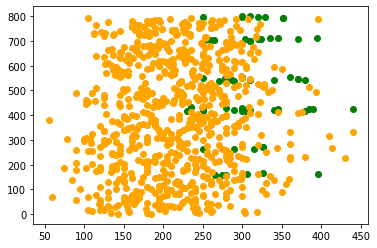

In [269]:
# Построю точечные графики, которые демострируют, что сумма и произведение HAD у легендарных покемонов
# превосходят эти показатели у обычных покемонов.
plt.scatter(x=pokemon_plus_legendary['HAD_sum'], y=pokemon_plus_legendary['pid'], color='green')
plt.scatter(x=pokemon_plus_ordinary['HAD_sum'], y=pokemon_plus_ordinary['pid'], color='orange')

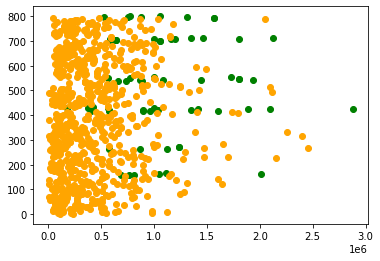

In [270]:
plt.scatter(x=pokemon_plus_legendary['HAD_product'], y=pokemon_plus_legendary['pid'], color='green')
plt.scatter(x=pokemon_plus_ordinary['HAD_product'], y=pokemon_plus_ordinary['pid'], color='orange')

In [276]:
#Проверю статистическую значимость отличий с помощью тестов для несвязанных выборок.
print(mannwhitneyu(pokemon_plus_legendary['HAD_sum'], pokemon_plus_ordinary['HAD_sum']))
print(mannwhitneyu(pokemon_plus_legendary['HAD_product'], pokemon_plus_ordinary['HAD_product']))
print(f_oneway(pokemon_plus_legendary['HAD_sum'], pokemon_plus_ordinary['HAD_sum']))
print(f_oneway(pokemon_plus_legendary['HAD_product'], pokemon_plus_ordinary['HAD_product']))

MannwhitneyuResult(statistic=5576.0, pvalue=5.635221584292926e-25)
MannwhitneyuResult(statistic=5741.5, pvalue=1.4775262883780305e-24)
F_onewayResult(statistic=134.37104128585798, pvalue=7.970942205720804e-29)
F_onewayResult(statistic=175.9138909709736, pvalue=1.9926643088419018e-36)


Таким образом, хотя средние характеристики легендарных покемонов по рассматриваемым столбцам выше, чем характеристики обычных покемонов, статистически значимых различий между выборками не обнаружено. Нулевую гипотезу отвергнуть нельзя.

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил четыре класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сумм и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [309]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [307]:
#Создаю группы для сравнения
def create_group(df, class_name):
    new_df =  df[(df['Class 1'] == class_name) | (df['Class 2'] == class_name)]
    new_df['Group'] = class_name
    return new_df

pokemon_rock = create_group(pokemon, 'Rock')
pokemon_ground = create_group(pokemon, 'Ground')
pokemon_steel = create_group(pokemon, 'Steel')
pokemon_ice = create_group(pokemon, 'Ice')

<ipython-input-307-481b4bd27db5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Group'] = class_name


In [318]:
#Получаю средние значения
print(f'Среднее значение защиты по классу Rock = {pokemon_rock.Defense.mean():.2f}')
print(f'Среднее значение защиты по классу Ground = {pokemon_ground.Defense.mean():.2f}')
print(f'Среднее значение защиты по классу Steel = {pokemon_steel.Defense.mean():.2f}')
print(f'Среднее значение защиты по классу Ice = {pokemon_ice.Defense.mean():.2f}')

Среднее значение защиты по классу Rock = 107.09
Среднее значение защиты по классу Ground = 87.70
Среднее значение защиты по классу Steel = 116.61
Среднее значение защиты по классу Ice = 76.66


In [323]:
print(f_oneway(pokemon_rock['Defense'], pokemon_ground['Defense'], pokemon_steel['Defense'], pokemon_ice['Defense']))
print(f_oneway(pokemon_rock['Defense'], pokemon_steel['Defense']))
print(f_oneway(pokemon_ground['Defense'], pokemon_ice['Defense']))

F_onewayResult(statistic=10.82012408304731, pvalue=1.231528168152447e-06)
F_onewayResult(statistic=1.6048649403226114, pvalue=0.20801798048000042)
F_onewayResult(statistic=2.2058821021629673, pvalue=0.14053946217093266)


<AxesSubplot:xlabel='Group', ylabel='Defense'>

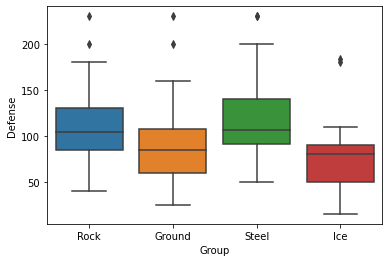

In [305]:
pokemon_for_boxplot = pokemon_rock.merge(pokemon_ground, how='outer').merge(pokemon_steel, how='outer').merge(pokemon_ice, how='outer')

sns.boxplot(x='Group', y='Defense', data=pokemon_for_boxplot)

In [317]:
#Тест по критерию Фишера демонстрирует статистически значимые различия между группами. Попробую провести попарные сравнения.
print(mannwhitneyu(pokemon_rock['Defense'], pokemon_steel['Defense']))
print(mannwhitneyu(pokemon_ground['Defense'], pokemon_ice['Defense']))
print(mannwhitneyu(pokemon_rock['Defense'], pokemon_ground['Defense']))
print(mannwhitneyu(pokemon_steel['Defense'], pokemon_ground['Defense']))
print(mannwhitneyu(pokemon_rock['Defense'], pokemon_ice['Defense']))
print(mannwhitneyu(pokemon_steel['Defense'], pokemon_ice['Defense']))

MannwhitneyuResult(statistic=1239.0, pvalue=0.12797627528850042)
MannwhitneyuResult(statistic=1035.0, pvalue=0.056349947868238826)
MannwhitneyuResult(statistic=1328.5, pvalue=0.0011765507817191286)
MannwhitneyuResult(statistic=908.0, pvalue=2.066682589734833e-05)
MannwhitneyuResult(statistic=558.0, pvalue=2.2857433129445333e-05)
MannwhitneyuResult(statistic=346.0, pvalue=2.731243288282665e-07)


Таким образом, между группами наблюдаются статистические различия, что подтверждает и общий тест Фишера, и попарные сравнения по критерию Манна-Уитни. Однако есть две пары, для которых нельзя отвергнуть гипотезу о сходстве: Rock / Steel и Ground / Ice. В целом утверждение о том, что все четыре группы одинаковы по параметру Defense, не подтвердилось.